In [18]:
#HIDE
try:
    import setup
except:
    pass
from notebook_helper import *
from modules import la
notebook_setup()

# Local government accounts

One requested filter is by local government service spend or income. The complication with this is there are lots of different possible figures and it's not entirely straightforward to combine the English, Scottish and Welsh data. It seems like an area where it's easy to do a lot of work to not present a useful outcome. 

This notebook explores the English accounts to get a better feeling for what's in the data. 


In [19]:
df = pd.read_excel(Path("data", "source", "RA_2021-22_data_by_LA.xlsx"),sheet_name="RA_LA_Data_2021-22", header=6 )
df = df[["ONS Code", "Class", "REVENUE EXPENDITURE"] + [x for x in df.columns if "TOTAL" in x]]
df = df[~df["ONS Code"].isna()]
df = df[~(df["Class"] == "O")]
df = df.la.code_from_gss("ONS Code", set_index=True).replace("...", np.NaN).la.add_info(["official-name","pop-2020", "local-authority-type-name"])
df = df.drop("LND") # london spend is way out of the range
df["per-person-service-spend"] = df["TOTAL SERVICE EXPENDITURE"] / df["pop-2020"]

The below graph shows the distribution in per person spend by local authority. 

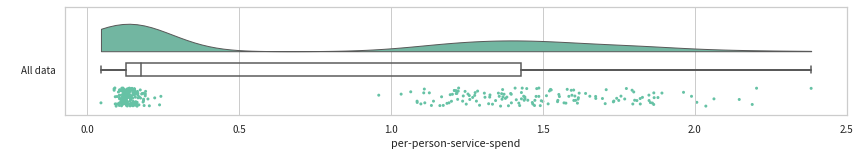

In [20]:
df["per-person-service-spend"].viz.raincloud()

This clearly shows two main groups, splitting by authority type shows the left hand cluster to be non-metropolitan districts. 

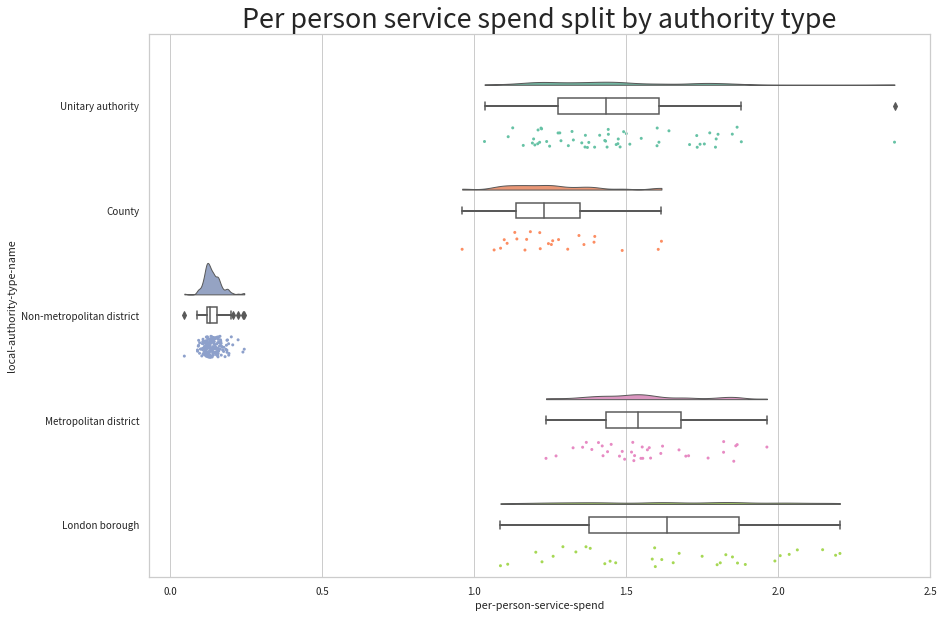

In [21]:
df.viz.raincloud("per-person-service-spend", "local-authority-type-name", title="Per person service spend split by authority type")


If we re-express in the leagues, there's clearly still a lot of variation inside the single tier group. 

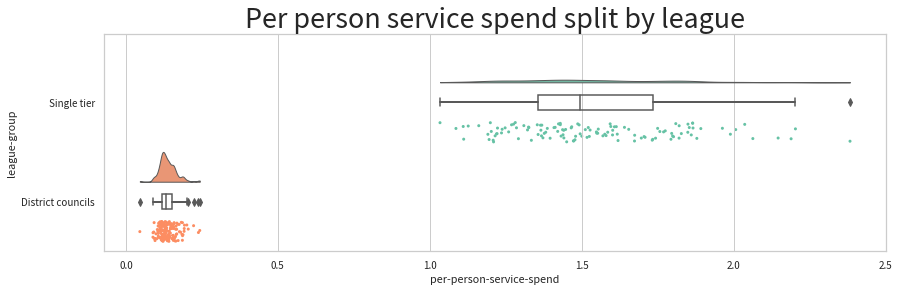

In [22]:
imd = pd.read_csv(Path("data", "outputs", "imd_split_ranking.csv")).set_index("local-authority-code")

df.join(imd).viz.raincloud("per-person-service-spend", "league-group", title="Per person service spend split by league")


This does *roughly* but not consistently follow deprivation (more deprived areas on average has more service spend), with some exceptions to that. 

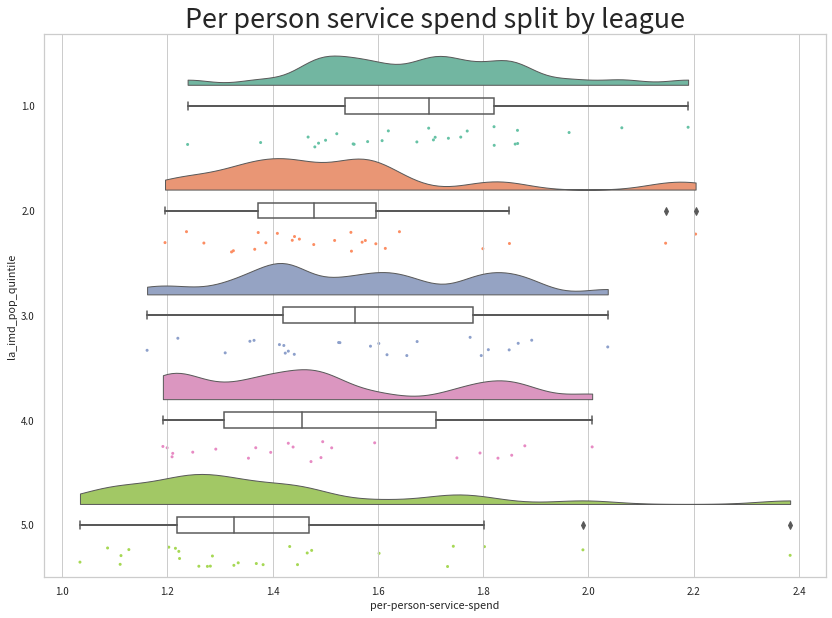

In [23]:
d = df.join(imd).loc[lambda df: df["league-group"] == "Single tier"]

d.viz.raincloud("per-person-service-spend", "la_imd_pop_quintile", title="Per person service spend split by league")

General conclusion, do not understand enough about local government accounts to know what a useful view to present from this is. 


This is looking at the all service spend, but is this the valid number for climate? In what way would we expect spend to relate to climate *capacity*?


Park for moment, revisit if can get more feedback from someone who understands local government account. 